## Gibbs Sampling

Gibbs sampling is a Markov Chain Monte Carlo (MCMC) method for sampling from a posterior distribution usually defined as $p(\theta|D)$. The idea behind the Gibbs Sampler is to sweep through each one of the parameters and sample from their conditional distributions, fixing the other parameters constant. For example, consider the random variables $X_1, X_2$ and assume that I can write out the analytic form of $p(X_1|X_2,X_3), p(X_2|X_1,X_3), p(X_3|X_2,X_1)$. We start by initializing $x_{1,t}, x_{2,t}, x_{3,t}$ and for each iteration $t$ we sample $p(X_{1,t+1}|X_{2,t},X_{3,t})$, $p(X_{2,t+1}|X_{1,t+1},X_{3,t})$, and $p(X_{3,t+1}|X_{2,t+1},X_{3,t+1})$. This process can then continue until convergence.

## Mixture of Normals

Now that we understand the ideas behind Gibbs Sampling, let's determine how we can use it to fit a mixture of 2 univariate gaussians. It can be very difficult to calculate the posterior under conjugate priods for a normal mixture model, so instead we can use a ${0,1}$ indicator variable $Z$ to make the calculations easier. 

If we let $\theta_j = \{\mu_j,\sigma^2_j,\pi\}$ we see that the joint density: 

$$p(x, z; \theta) = p(x|z,\theta) p(z,\theta)$$

where: 
$$p(x|z,\theta) = \phi_{\theta_1}(x)^{z_1}\phi_{\theta_2}(x)^{z_2}$$

And $p(z,\theta)$ comes from the multinomial distribution with density $\frac{n!}{x_1!x_2!}\pi_1^{z_1}\pi^{z_2}$. Because $z$ is an indicator variable, $\frac{n!}{x_1!x_2!} = 1$ so our second term is given by:

\begin{align*}
p(z,\theta) & = \pi^{z_1}(1-\pi)^{z_2}\\
p(z,\theta) & = \prod_{j=1}^K\pi^{z_j}
\end{align*}

Which gives the joint density over $x,z$ as:
$$p(x, z; \theta) = \prod_{i=1}^N\left[\pi\phi_{\theta_1}(x_i)\right]^{z_1}\left[(1-\pi)\phi_{\theta_2}(x_i)\right]^{z_2}$$
We can now define our prior distributions using conjugacy. Using conjugate priors is helpful because it allows us to easily compute the posterior. We define our priors over $\{\mu_j,\sigma^2_j,\pi\}$ as follows:

\begin{align*}
p(\pi) & \sim Beta(1, 1)\\
p(\mu_j) & \sim N(0,1)\\
p(\sigma_j^2) & \sim IG(1, 1)
\end{align*}

With densities,

\begin{align*}
p(\pi|\alpha,\beta) & = \pi^{\alpha-1}(1-\pi)^{\beta-1}\\
& \propto const\\
p(\mu_j|\mu_0,\tau^2) & = \frac{1}{\sqrt{2\pi\tau^2}}\exp\left[-\frac{(\mu_j - \mu_0)^2}{2\tau^2}\right]\\
& \propto \exp\left[-\frac{\mu_j^2}{2\tau^2}\right]\\
p(\sigma_j^2|\delta, \psi) & = \left(\sigma^2_j\right)^{-\delta - 1}\exp\left[-\frac{\psi}{\sigma^2_j}\right]\\
& \propto \left(\sigma^2_j\right)^{-2}\exp\left[-\frac{1}{\sigma^2_j}\right]
\end{align*}

And where we've defined the set of hyperparameters in our priors as follows, $\{\alpha=1, \beta=1, \mu_0=0, \sigma^2=1, \delta=1, \psi=1\}$.

$$\pi^{\sum_{i=1}^Nz_{1i}-\alpha-1}(1-\pi)^{\sum_{i=1}^Nz_{2i}-\beta-1}$$
$$\prod_{j=1}^{2}(\sigma^2_j)^{-2}\exp\left[-\frac{1}{\sigma^2} - \frac{\mu^2}{2}\right]$$

Which leads to the posterior distribution of $\theta$ where $\theta = \{\pi, \mu, \sigma^2\}$:
\begin{align*}
p(\theta|x,z) & = p(x, z| \theta)p(\pi)\prod_{j=1}^k\left[p(\mu_j)p(\sigma_j^2)\right]\\
& = \prod_{i=1}^N\pi^{z_1}\phi_{\theta_1}(x_i)^{z_1}\prod_{i=1}^N(1-\pi)^{z_1}\phi_{\theta_2}(x_i)^{z_2}\\
& = \prod_{i=1}^N\pi^{z_1}\prod_{i=1}^N\pi^{z_2}\prod_{i=1}^N\phi_{\theta_1}(x_i)^{z_1}\prod_{i=1}^N\phi_{\theta_2}(x_i)^{z_2}\exp\left[-\frac{\mu_j^2}{2\tau^2}\right]\left(\sigma^2_j\right)^{-2}\exp\left[-\frac{1}{\sigma^2_j}\right]\\
& = \pi^{\sum_{i=1}^Nz_1}(1-\pi)^{\sum_{i=1}^Nz_2}\prod_{i=1}^N\prod_{j=1}^K\phi_{\theta_j}(x_i)^{z_j}\prod_{j=1}^K\exp\left[-\frac{\mu_j^2}{2\tau^2}\right]\left(\sigma^2_j\right)^{-2}\exp\left[-\frac{1}{\sigma^2_j}\right]\\
\end{align*}

Now that we can isolate our variables to solve for the complete conditionals. The easiest to see is the complete conditional for $\pi$.

\begin{align*}
p(\pi|x, z) & = \int_0^{\infty}\int_0^{\infty}p(\theta|x,z)d\mu d\sigma\\
& \propto \pi^{\sum_{i=1}^Nz_1 + 1 - 1}(1-\pi)^{\sum_{i=1}^Nz_2 + 1 - 1}\\
p(\pi|x, z) & \sim Beta\left(\sum_{i=1}^Nz_1 + 1, \sum_{i=1}^Nz_2 + 1\right) 
\end{align*}

Similarly we can work out the complete conditional for $\mu$.

\begin{align*}
p(\mu|x, z) & = \int_0^{\infty}\int_0^{\infty}p(\theta|x,z)d\pi d\sigma\\
& \propto \prod_{n=1}^N\prod_{j=1}^K\phi_{\theta_j}(x_i)^{z_j}\prod_{j=1}^K\exp\left[-\frac{\mu_j^2}
{2\tau^2}\right]\\
\end{align*}
We can stick with a singular instance of $\mu$ to simplify this a bit and get rid or the product over $K$ because we know that the calculation is going to be the same for all $\mu$. Also, let $\sum_{i=1}^Nz_{ij} = n_j$

\begin{align*}
& \propto \prod_{n=1}^N\phi_{\theta_1}(x_i)^{z_1}\exp\left[-\frac{\mu_1^2}{2\tau^2}\right]\\
& \propto \exp\left[-\frac{\sum_{i=1}^Nz_{i1}(x_i - \mu_1)^2}{2\sigma_j^2} - \frac{\mu_1^2}{2\tau^2}\right]\\
& \propto \exp\left[-\frac{\sum_{i=1}^Nz_{i1}x_i^2 - 2\mu_1x_iz_{i1} + z_{i1}\mu_1^2}{2\sigma_j^2} - \frac{\mu_1^2}{2\tau^2}\right]\\
\end{align*}

Take a look at the (negative of the) operand of the exponential to put it in the usual form. This involves some completing-the-square:

$$ \begin{align}  \frac{\left(\sum_{i=1}^N z_{i1}x_i^2\right)}{2\sigma_1^2} - \frac{2 \left(\sum_{i=1}^N z_{i1}x_i \right)}{2\sigma_1^2} \mu_1 + \frac{\left(\sum_{i=1}^N z_{i1}\right)}{2\sigma_1^2} \mu_1^2 + \frac{1}{2\tau^2} \mu_1^2 & =  \left(\frac{1}{2\tau^2}+\frac{n_1}{2\sigma_1^2} \right)\mu_1^2 - \left(\frac{2 \left(\sum_{i=1}^N z_{i1}x_i \right)}{2\sigma_1^2}\right)\mu_1 + \left(\frac{\left(\sum_{i=1}^N z_{i1}x_i^2\right)}{2\sigma_1^2}\right)    \end{align} $$

We can make some definitions to clean up the notation, particularly around the sums; let $$ n_{x,1} = \sum_{i=1}^N x_i z_{i1}$$ and $$ n_{x^2,1} = \sum_{i=1}^N x_i^2 z_{i1}$$ Then the above expansion becomes
$$ \begin{align} \left(\frac{1}{2\tau^2}+\frac{n_1}{2\sigma_1^2} \right)\mu_1^2 - \left(\frac{2 n_{x,1}}{2\sigma_1^2}\right)\mu_1 + \left(\frac{n_{x^2,1}}{2\sigma_1^2}\right)  & = \left(\frac{\sigma_1^2+n_1\tau^2}{2\tau^2\sigma_1^2} \right)\mu_1^2 - \left(\frac{n_{x,1}}{\sigma_1^2}\right)\mu_1 + \left(\frac{n_{x^2,1}}{2\sigma_1^2}\right)  \\ & =  \left(\frac{\sigma_1^2+n_1\tau^2}{2\tau^2\sigma_1^2} \right) \left[ \mu_1^2 - \left( \frac{2\tau^2\sigma_1^2}{\sigma_1^2 + n_1 \tau^2} \right)\left(\frac{n_{x,1}}{\sigma_1^2}\right)\mu_1 + \left( \frac{2\tau^2\sigma_1^2}{\sigma_1^2 + n_1 \tau^2} \right) \left(\frac{n_{x^2,1}}{2\sigma_1^2}\right)\right] \\ & =  \left(\frac{\sigma_1^2+n_1\tau^2}{2\tau^2\sigma_1^2} \right) \left[ \mu_1^2 - 2\left( \frac{n_{x,1}\tau^2}{\sigma_1^2 + n_1 \tau^2} \right)\mu_1 + \left( \frac{n_{x^2,1}\tau^2}{\sigma_1^2 + n_1 \tau^2} \right) \right] \end{align} $$

Let's try to recall the complete-the-square formulas: we can rewrite a polynomial of the form $$ x^2 - 2b x + c $$ by cleverly adding and subtracting the same term: $$ \begin{align} x^2 - 2b x + c & =  x^2 - 2b x + b^2 +\left(c-b^2\right) \\ & = \left(x-b\right)^2 + \left(c-b^2\right)  \end{align} $$ Note that only the first term of this factorization depends on $x$; hence, in our application we can ignore the second term since it is constant w.r.t. $\mu_1$, and will be pulled out of as another constant exponential factor (since all this is taking place in the operand of an exponential).
$$ \begin{align} \left(\frac{\sigma_1^2+n_1\tau^2}{2\tau^2\sigma_1^2} \right) \left[ \mu_1^2 - 2\left( \frac{n_{x,1}\tau^2}{\sigma_1^2 + n_1 \tau^2} \right)\mu_1 + \left( \frac{n_{x^2,1}\tau^2}{\sigma_1^2 + n_1 \tau^2} \right) \right]  & = \left(\frac{\sigma_1^2+n_1\tau^2}{2\tau^2\sigma_1^2} \right) \left[ \left(\mu_1 - \frac{n_{x,1}\tau^2}{\sigma_1^2 + n_1 \tau^2} \right)^2  + \left( \frac{n_{x^2,1}\tau^2}{\sigma_1^2 + n_1 \tau^2} \right) - \left(\frac{n_{x,1}\tau^2}{\sigma_1^2 + n_1 \tau^2}\right)^2 \right]  \\ & = \frac{1}{2} \left(\frac{\sigma_1^2+n_1\tau^2}{\tau^2\sigma_1^2} \right) \left(\mu_1 - \frac{n_{x,1}\tau^2}{\sigma_1^2 + n_1 \tau^2} \right)^2  + \text{const.}  \end{align} $$ which looks an awful lot like a Gaussian density for $\mu_1$: $$ \mu_1 \sim  \mathcal{N} \left( \frac{n_{x,1}\tau^2}{\sigma_1^2 + n_1 \tau^2}, \frac{\tau^2\sigma_1^2}{\sigma_1^2 + n_1 \tau^2} \right) $$



In [1]:
import numpy as np
from numpy.random import binomial, normal, beta, multinomial
import scipy.stats as st
from scipy.stats import invgamma, norm
import matplotlib.pyplot as plt
from distcan import InverseGamma

def data_gen(mu, sigmas, phi, n):
    """
    Generates samples from Mixture of 2 Gaussian Distributions
    """
    y = []
    for i in range(n):
        ind = binomial(1, phi, 1)
        if ind == 1:
            y.append(norm(mu[0], sigmas[0]).rvs())
        else:
            y.append(norm(mu[1], sigmas[1]).rvs())
    return np.array(y)

def update_pi(N, n):
    """
    Sample from Posterior Conditional for pi
    """
    return beta(1+n, 1+(N-n))

def update_mu(y, sigma):
    """
    Sample from Posterior Conditional for mu
    """
    n = len(y)
    return normal(y.sum() / (n + 1), np.sqrt(sigma / n))

def update_sigma(y, mu):
    """
    Sample from Posterior Conditional for sigma
    """
    alpha = (0.5 * len(y))
    beta = (0.5 * np.square(y - mu).sum()) + 1
    return InverseGamma(alpha, beta).rvs()

def update_z(data: list, mu, sigma, pi):
    """
    Sample from latent variable Z according to likelihoods for class assignment
    """
    a = norm(mu[0], np.sqrt(sigma[0])).pdf(data) * pi
    b = norm(mu[1], np.sqrt(sigma[1])).pdf(data) * pi
    pi_i = a / (a + b)
    return binomial(1, pi_i)

def gibbs(data, iters, burnin):
    """
    Run Gibb's Sampling for Mixture of 2 Gaussians. Initial States are sample from Priors
    """
    # Set initial guesses based on priors
    mu = normal(0, 1, size=2)
    pi = beta(1,1)
    sigma = InverseGamma(1,1).rvs(size=2)
    out = np.empty((iters, 5))

    for i in range(iters):
        # Update Parameters according to conditional posterior distributions
        z1 = update_z(data, mu, sigma, pi)
        pi = update_pi(len(data), len(data[z1==1]))
        mu[0] = update_mu(data[z1 == 1], sigma[0])
        mu[1] = update_mu(data[z1 == 0], sigma[1])
        sigma[0] = update_sigma(data[z1 == 1], mu[0])
        sigma[1] = update_sigma(data[z1 == 0], mu[1])

        # Store Values to monitor trace
        out[i, 0:2] = mu
        out[i, 2:4] = np.sqrt(sigma)
        out[i, 4] = pi
    
    return out[burnin:,:]


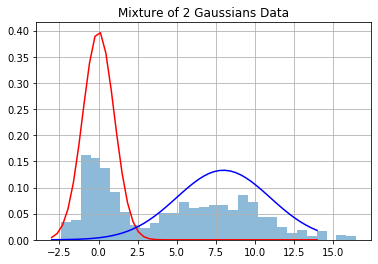

In [225]:
# Set Starting Parameters
mu = [0, 8]
sigmas = [1, 3]
phi = .4
n = 500
y = data_gen(mu=mu, sigmas=sigmas, phi=phi, n=n)
x = np.linspace(-3,14)

# Create Plot of Data 
plt.hist(y, 30, density=True, alpha=0.5)
plt.plot(x, norm(mu[0], sigmas[0]).pdf(x), color="red")
plt.plot(x, norm(mu[1], sigmas[1]).pdf(x), color="blue")
plt.title("Mixture of 2 Gaussians Data")
plt.grid()
plt.show()

In [226]:
trace = gibbs(y, 2000, 500)
mu1 = np.round(np.mean(trace[:,0]),2)
mu2 = np.round(np.mean(trace[:,1]),2)
sigma1 = np.round(np.mean(trace[:,2]),2)
sigma2 = np.round(np.mean(trace[:,3]),2)
pi = np.round(np.mean(trace[:,4]),2)


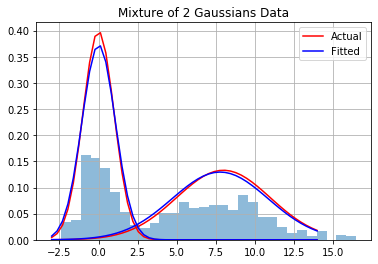

In [227]:
plt.hist(y, 30, density=True, alpha=0.5)
plt.plot(x, norm(mu[0], sigmas[0]).pdf(x), color="red", label="Actual")
plt.plot(x, norm(mu[1], sigmas[1]).pdf(x), color="red")
plt.plot(x, norm(mu1, sigma1).pdf(x), color="blue", label="Fitted")
plt.plot(x, norm(mu2, sigma2).pdf(x), color="blue")
plt.title("Mixture of 2 Gaussians Data")
plt.legend(loc="upper right")
plt.grid()
plt.show()

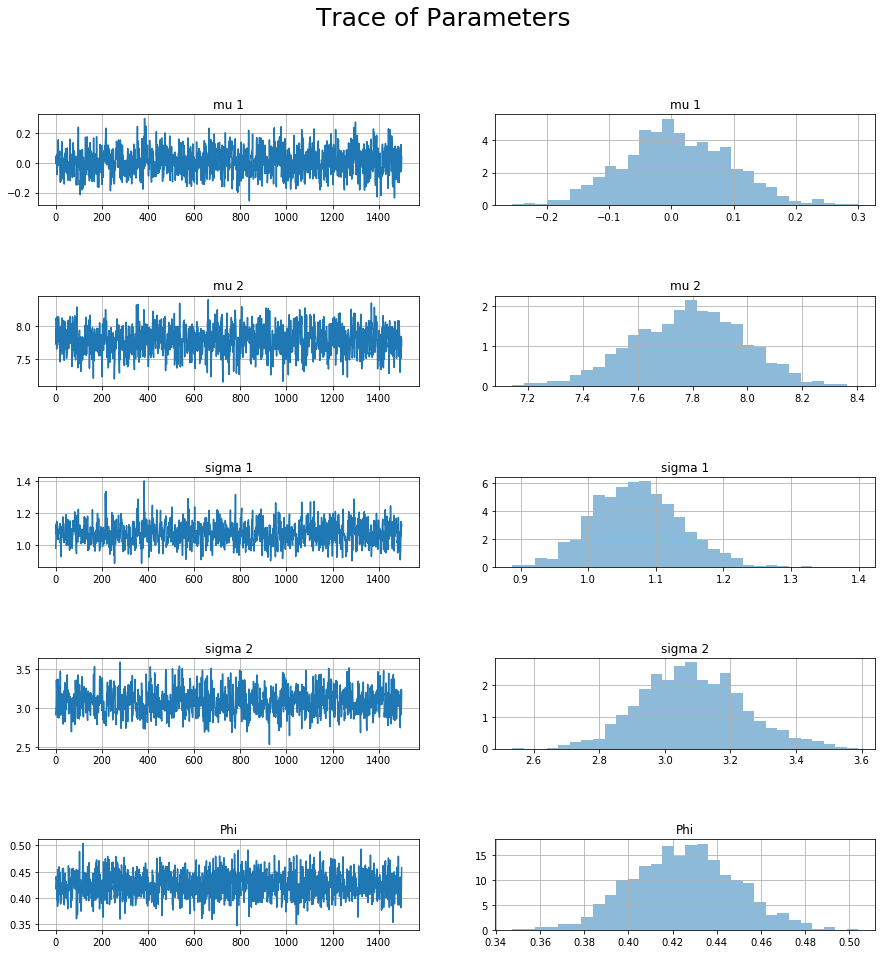

In [228]:
fig, axs = plt.subplots(5,2)
x = range(trace.shape[0])
params = ["mu 1", "mu 2", "sigma 1", "sigma 2", "Phi"]
for i, v in enumerate(params):
    y = trace[:,i]
    axs[i,0].plot(x, y)
    axs[i,0].set_title(v)
    axs[i,1].hist(y, 30, density=True, alpha=0.5)
    axs[i,1].set_title(v)
    axs[i,0].grid()
    axs[i,1].grid()

fig.suptitle("Trace of Parameters", fontsize=25)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=1)
fig.show()